# Test countries analysis: Japan

These notebooks apply the harmonizer model to each of the shapefiles provided in the `roifiles/` sub-directory:
- Contiguous US ("CONUS") 
- Germany 
- Spain 
- France 
- Italy 
- Japan **featured in this notebook**
- Mauritius
- Nicaragua
- Puerto Rico
- El Salvador
- Uganda

As a prerequisite to executing this analyis the harmonizer must be run to get the outputs. This can be done for all countries in the test folder at once. To run, simply to go command line (at root level of this repo) and enter:

`$ python -m harmonizer.main -a`

It will take ~40 min (2-3 minutes for each country, except the US which takes 20+).

Results for all will be in the `outputs/<country_shapefile_name>` and `results/<country_shapefile_name>` sub-directories.

In [1]:
from IPython.display import Image, Video
from harmonizer.diagnostics import *
from harmonizer.config import DMSP_CLIP, VIIRS_CLIP
from harmonizer.plots import difference_plots
import seaborn as sns
import matplotlib.pyplot as plt

## Japan time lapse raw vs harmonized

A time lapse video of nighttimme lights from 1992 - present (DMSP-OLS until 2013, then VIIRS-DNB).

In [2]:
results_dir = "gadm36_JPN_0"
Video(f"../results/{results_dir}/raw.mp4",width=700)

The fluctuations in DMSP are visible and the shift to VIIRS-DNB (which is measured in completely different units) is so abrupt that the image goes dark.

Here's the time lapse after the harmonization:

In [3]:
Video(f"../results/{results_dir}/final.mp4",width=700)

DMSP-OLS fluctuations remain although they're dampened, but the VIIRS-DNB is coherent.

## Analysis of 2013 annual composite where DMSP-OLS and VIIRS-DNB overlap (used for training)

### Visual comparison

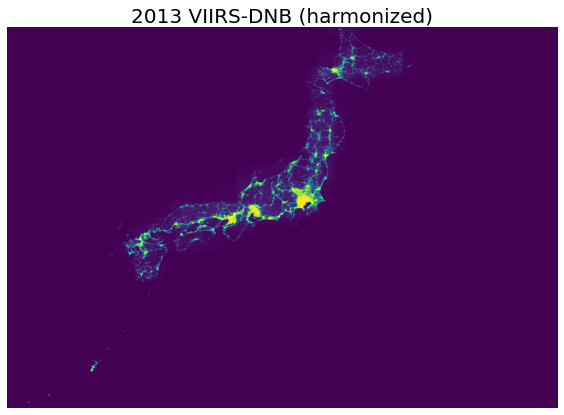

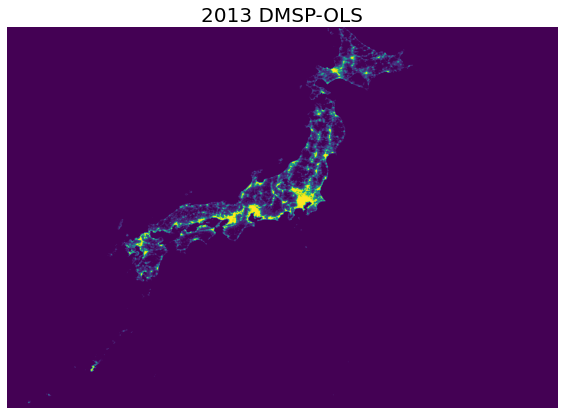

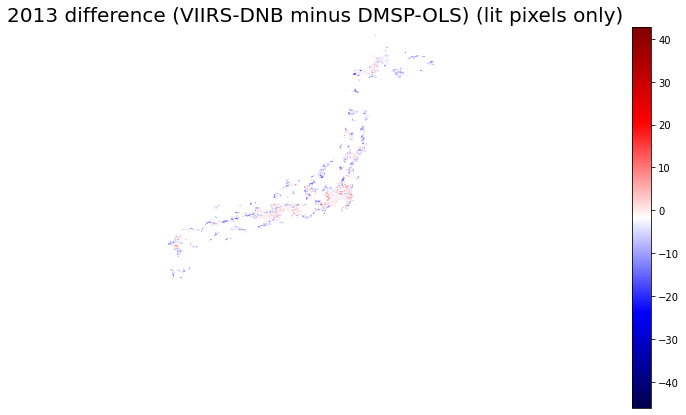

In [4]:
difference_plots(Path(Path.cwd().parent, "results", results_dir, "2013_comparison_raster.tif"))

At a glance the differences are tough to discern (top and middle), athough the higher sensitivity VIIRS-DNB shows more structure and detail in the rural and outer suburb areas. 

The difference map further highlights this: areas outside the urban areas show higher VIIRS-DNB relative to DMSP-OLS (red) but the urban cores show that the DMSP-OLS is more intense (blue), likely due to the high saturation of DMSP-OLS in light-intense areas that the model didnt fully correct for.


### Histogram of 2013 DMSP-OLS and VIIRS-DNB for Japan

![hist](../results/gadm36_JPN_0/2013hist.png)

The histogram shows a decent alignment in distribution of VIIRS after harmonization (blue) and DMSP (red). The Anderson-Darling non-paramentric test of variance in distribution failed to reject the null (that these are drawn from the same population) -- i.e. no evidence that these samples vary significantly. Curiously the DMSP-OLS calibration process coerced data such that no digital number fell in a few values (18, 34, 48).

#### Scattepot of 2013 VIIRS-DNB (after harmonization) and DMSP-OLS for Japan

![scatter](../results/gadm36_JPN_0/2013scatter.png)

Scatter shows a strong linear alignment of VIIRS-DNB (after harmonization) and DMSP-OLS, although there is a surprising variance along DMSP-OLS values for low light areas (<5) relative to VIIRS that is uncommon compared to other test countries.

## Time series of annual composites (1992-2020) after harmonization
In all plots, pixels with a "digital number" of less than 3 have been masked.

### Mean radiance per pixel (DMSP-OLS-like "digital number")

![ts mean](../results/gadm36_JPN_0/harmonized_ts_mean.png)

### Median radiance per pixel (DMSP-OLS-like "digital number")

![ts md](../results/gadm36_JPN_0/harmonized_ts_median.png)

### Sum of Lights (DMSP-OLS-like "digital number")

![ts mean](../results/gadm36_JPN_0/harmonized_ts_sum.png)

The median reduction shows a DMSP-VIIRS discontinuity and the SOL plot shows a sizeable peak for lights in DMSP. The overall time series appears comparable, but noisy.